**Практическая часть экзамена
Выполнила Ковалева Варвара, вариант 15**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Первичный анализ

##Загрузка данных

In [ ]:
data_full = pd.read_excel('/content/24_MAG_Exam_Practice_15.xls', header=None)
data = data_full.iloc[:,:6]
data.columns = ["age", "children", "salary", "living_period", "car_price", "loan_value"]

In [ ]:
data.head()

,age,children,salary,living_period,car_price,loan_value
0,38,1,7500,9,7000,71000
1,38,2,31900,8,32000,319000
2,29,1,25000,3,23000,237000
3,54,4,23100,18,26000,249000
4,33,2,31800,5,31000,311000


In [ ]:
data.shape

(70, 6)

В данных всего 70 объектов.

##1-3. Анализ данных

###Основные характеристики данных

In [ ]:
data.describe()

,age,children,salary,living_period,car_price,loan_value
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,39.985714,2.071429,20000.000000,9.957143,20014.285714,200014.285714
std,8.074818,1.026058,9999.391286,5.017175,9927.991255,100000.361283
min,20.000000,-1.000000,2600.000000,-2.000000,2000.000000,19000.000000
25%,34.250000,1.250000,11325.000000,6.250000,12000.000000,119750.000000
50%,39.000000,2.000000,20250.000000,9.000000,20000.000000,199500.000000
75%,46.500000,3.000000,26875.000000,14.000000,26750.000000,265750.000000
max,60.000000,5.000000,40300.000000,22.000000,43000.000000,422000.000000


По полученным значениям характеристик можно увидеть, что присутсвуют некорректные данные в виде объектов с отрицательным значением количества иждевенцев и отрицательным значением срока проживания в регионе.

В данных нет пропусков (так как в строке count для всех объектов одинаковое значение 70, соответсвующее общему количеству объектов).


###Нормировка

Так как средние значения признаков сильно отличаются (по смыслу признаки имеют разные системы измерения), то при дальнейших расчетах некоторые признаки могут оказывать большее влияние. Для более правильного исследования стоит нормировать данные.

In [ ]:
data_norm = data / np.sqrt(np.square(data).sum(axis=0))
data_norm.head()

,age,children,salary,living_period,car_price,loan_value
0,0.111371,0.051778,0.040147,0.096618,0.037502,0.038003
1,0.111371,0.103556,0.170759,0.085883,0.171437,0.170747
2,0.084994,0.051778,0.133824,0.032206,0.123220,0.126856
3,0.158264,0.207112,0.123653,0.193236,0.139293,0.133279
4,0.096717,0.103556,0.170224,0.053677,0.166080,0.166465


Проверяем результат центрирования с помощью вычисления евклидовой нормы каждого признака (она должна быть равна 1):

In [ ]:
np.square(data_norm).sum(axis=0)

,0
age,1.0
children,1.0
salary,1.0
living_period,1.0
car_price,1.0
loan_value,1.0


###Гистограммы и блок-диаграммы признаков

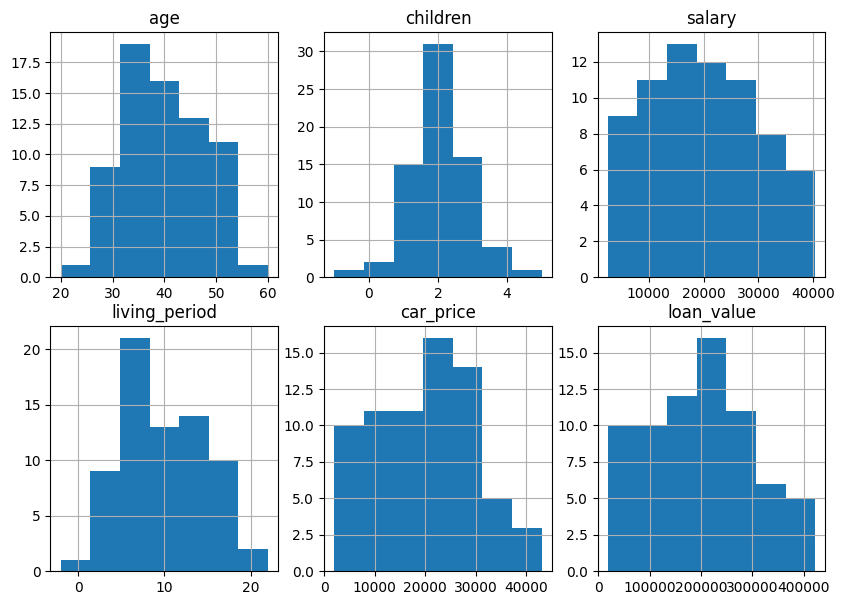

In [ ]:
fig = plt.figure(figsize =(10, 7))
for i, column in enumerate(data.columns):
  plt.subplot(2, 3, i+1)
  plt.hist(data[column].dropna(), bins=7);
  plt.title(column)
  plt.grid()

 Так как данных очень мало, то по гистограммам признаков сложно сказать, какое у них распределение. Можно было бы сделать предположение, что признаки "возраст" и "количество иждевенцев" имеют нормальное распределение.

# Снижение размерности. Метод MDS


##4. Возможность снижения размерности данных

Вычислим расстояния между клиентами как скалярное произведение строк нормированной матрицы data_norm.

In [ ]:
dist = np.zeros((len(data_norm), len(data_norm)))
for i in range(len(data_norm)):
  for j in range(i, len(data_norm)):
    dist[i][j] = np.linalg.norm(data_norm.iloc[i] - data_norm.iloc[j])
    dist[j][i] = np.linalg.norm(data_norm.iloc[i] - data_norm.iloc[j])

In [ ]:
dist

array([[0.        , 0.23540425, 0.16988936, ..., 0.17907077, 0.15103997,
        0.14667022],
       [0.23540425, 0.        , 0.10896511, ..., 0.1122945 , 0.19054799,
        0.12932474],
       [0.16988936, 0.10896511, 0.        , ..., 0.1493832 , 0.20299773,
        0.026772  ],
       ...,
       [0.17907077, 0.1122945 , 0.1493832 , ..., 0.        , 0.08397095,
        0.15031328],
       [0.15103997, 0.19054799, 0.20299773, ..., 0.08397095, 0.        ,
        0.19464023],
       [0.14667022, 0.12932474, 0.026772  , ..., 0.15031328, 0.19464023,
        0.        ]])

In [ ]:
n=len(data_norm)
I=np.diag(np.ones(n))
U=np.ones((n,n))
gramm=-0.5*(I-U*(1/n))*np.square(dist)*(I-U*(1/n))
eig_gramm=sorted(np.linalg.eigvalsh(gramm), reverse=True)
print("Собственные числа матрицы грамма")
for i in range(1,len(eig_gramm)+1):
    print("{:6.6f}".format(eig_gramm[i-1]), end='\t')
    if(i%6==0): print()

Собственные числа матрицы грамма
0.000124	0.000083	0.000031	0.000002	0.000000	0.000000	
0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	
0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	
0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	
0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	
0.000000	0.000000	0.000000	0.000000	0.000000	0.000000	
0.000000	-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	
-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	
-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	
-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	
-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	-0.000000	
-0.000000	-0.000000	-0.000000	-0.000240	

Как мы видим, ненулевые собственные значения не сильно отличаются друг от друга. Так как четвертое в несколько раз меньше первых трех собственных значений, можно предположить, что клиентов можно поместить в евклидовое пространство размерности 3 с сохранением расстояний. Сказать тоже самое про размещение в пространство размерности 2 сложнее, так как второе и третье отличаются чуть больше чем в 2,5 раза.

##5. Использование алгоритма MDS

Для размещения клиентов в евклидовое пространство размерности 2 будем использовать итеративный процесс мажоризации стресса, а именно алгоритм SMACOF (англ. Scaling by MAjorizing a COmplicated Function)

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2, dissimilarity='precomputed')
Z_MDS_2 = mds.fit_transform(dist)

Получаем следующее размещение объектов:

In [ ]:
pd.DataFrame(Z_MDS_2)

,0,1
0,0.009337,-0.130964
1,-0.062464,0.093855
2,-0.105109,-0.007526
3,0.106694,0.099193
4,-0.087943,0.080504
...,...,...
65,-0.075573,-0.052240
66,-0.039820,0.090857
67,0.035262,0.045615
68,0.098131,-0.007960


###Погрешность размещения

Расcчитаем погрешность такого размещения

In [ ]:
distances1 = np.zeros((len(data_norm), len(data_norm)))
for i in range(len(data_norm)):
  for j in range(i, len(data_norm)):
    distances1[i][j] = np.linalg.norm(Z_MDS_2[i] - Z_MDS_2[j])
    distances1[j][i] = np.linalg.norm(Z_MDS_2[i] - Z_MDS_2[j])
print(f"Стандартный стресс Краскаля: {np.square(dist - distances1).sum().sum()/np.square(dist).sum().sum()}")
print(f"MAE размещения: {np.abs(dist - distances1).mean()}")
print(f"MAPE размещения: {np.nanmean(np.abs(dist - distances1)/(dist+1e-10))}")
print(f"MSE размещения: {np.square(dist - distances1).mean()}")


Стандартный стресс Краскаля: 0.0002236521011879403
MAE размещения: 0.0014501570698443717
MAPE размещения: 0.01786537681807639
MSE размещения: 6.544332789984212e-06


Полученное размещение имеет маленькую погрешность аппроксимациии

###Карта клиентов

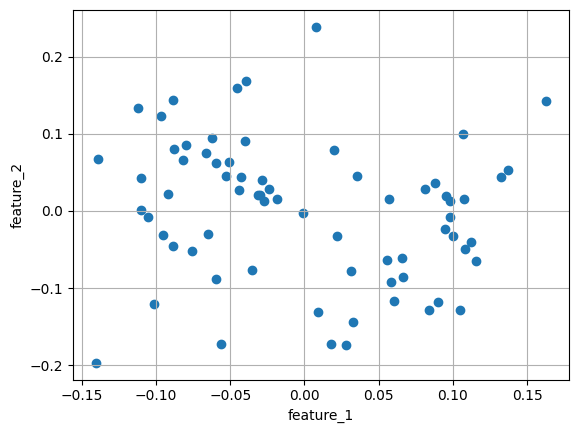

In [ ]:
plt.scatter(pd.DataFrame(Z_MDS_2).iloc[:, 0], pd.DataFrame(Z_MDS_2).iloc[:, 1])
plt.xlabel('feature_1')
plt.ylabel('feature_2')
plt.grid()

По данной карте клиентов можно сказать, что объекты можно было бы выделить два кластера, разделенные по диагонали y=x.

##Кластеризация

###7. Матрица расстояний и матрица близости

В пункте 4 была найдена матрица расстояний объекта. С помощью нее перейдем к матрице близости по формуле: $$ sim(x,y) = e^{\frac{-dist^{2}(x,y)}{2\sigma^{2}}}  $$

In [ ]:
sigma=0.1
sim = np.exp(-dist**2/(2*sigma**2))
sim

array([[1.        , 0.06261452, 0.23618974, ..., 0.20122793, 0.31961004,
        0.3410904 ],
       [0.06261452, 1.        , 0.55229676, ..., 0.53232414, 0.16276842,
        0.43333492],
       [0.23618974, 0.55229676, 1.        , ..., 0.32766384, 0.1274025 ,
        0.96479755],
       ...,
       [0.20122793, 0.53232414, 0.32766384, ..., 1.        , 0.70288917,
        0.32312884],
       [0.31961004, 0.16276842, 0.1274025 , ..., 0.70288917, 1.        ,
        0.15043247],
       [0.3410904 , 0.43333492, 0.96479755, ..., 0.32312884, 0.15043247,
        1.        ]])

###8. Разбиение с помощью spectral method

Для нахождения разбиения с помощью Spectral algorithm (Normolized) был использован класс SpectralClustering библиотеки sklearn. В данный класс я передовала необходимое количество кластеров и находила разбиение на основе матрицы близостей (для это указывала, что матрица была предрпсчитана affinity="precomputed").

In [ ]:
from sklearn.cluster import SpectralClustering
spec = SpectralClustering(2, affinity="precomputed", random_state=0).fit(sim)
split = spec.labels_

In [ ]:
from sklearn.decomposition import PCA
def print_splits(split, features, n_components):
  print("Разбиение, полученное с помощью spectral алгоритма:\n", split, sep="")
  plt.figure()
  for i in range(n_components):
    plt.scatter(pd.DataFrame(Z_MDS_2).iloc[split==i, 0], pd.DataFrame(Z_MDS_2).iloc[split==i, 1])
  plt.title("Spectral")
  plt.show()

Разбиение, полученное с помощью spectral алгоритма:
[0 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1
 0 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 1]


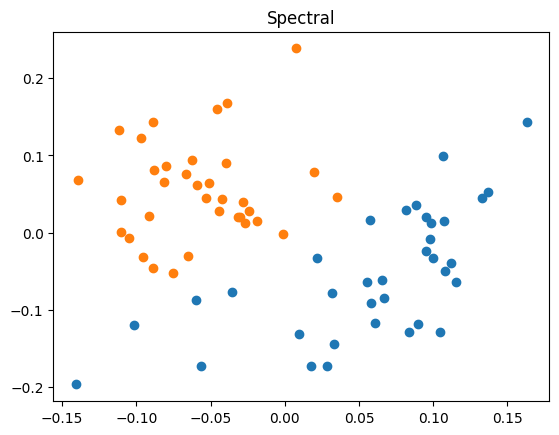

In [ ]:
print_splits(split, data_norm, 2)

### 9. Оценка качества кластеризации

Рассмотрим Silhouette Score (также известен как Silhouette Coefficient, коэффициент силуэта). Коэффициент силуэта — это метрика оценки кластеризации в диапазоне от -1 до 1. Коэффициент силуэта рассчитывается с использованием среднего расстояния между точками внутри кластера и среднего расстояния до ближайшего кластера для каждой точки.

In [ ]:
from sklearn.metrics import silhouette_score
def find_silhouette_score(dist, split):
    ss = silhouette_score(dist, split, metric="precomputed")
    print(f"Spectral silhouette_score = {ss}")

In [ ]:
find_silhouette_score(dist, split)

Spectral silhouette_score = 0.4169432260759393


Нельзя сказать, что это высокий показатель кластеризации. Хотя по картинкам и так понятно, что данные в принципе не идеально кластеризуются на два кластера.

###10. Сравнение по Rand индексу

In [ ]:
from sklearn.metrics import rand_score
print(rand_score(split, data_full.iloc[:,8]))

0.8173913043478261


По данному значению видно, что кластеры достаточно схожи. То есть spectral method более менее подходит для выделения качества заемщиков.